In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("extRemes")
library(extRemes)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘RcppArmadillo’, ‘Lmoments’, ‘distillery’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/RcppArmadillo_0.10.7.0.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1675477 bytes (1.6 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to 

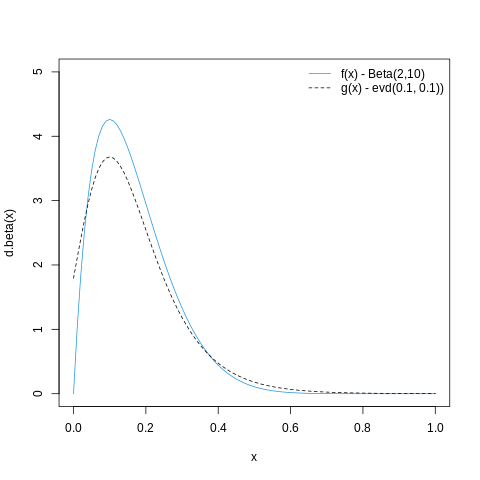

In [ ]:
%%R
## Considere que deseja-se gerar valores de uma distribuição Beta(2,10)
# Distribuição proposta evd(x, 0.1,0.1)) ; evd = Extreme Value Distribution


alfa = 2
beta = 10
d.beta = function(x){(gamma(alfa+beta)*x^(alfa-1)*((1-x)^(beta-1)))/(gamma(alfa)*gamma(beta))}

curve(d.beta(x), from = 0, to = 1, col = 4, ylim = c(0, 5))
curve(devd(x, 0.1, 0.1), add = TRUE, lty = 2)
legend("topright", legend = c("f(x) - Beta(2,10)", "g(x) - evd(0.1, 0.1))"),
       lty = c(1, 2), col = c(4, 1), bty = "n")

In [ ]:
%%R
(M <- optimize(f = function(x) {d.beta(x)/devd(x, 0.1,0.1)},
               interval = c(0, 1), maximum = TRUE)$objective)

[1] 1.160455


In [ ]:
%%R
## Define funções
f <- function(x){(gamma(alfa+beta)*x^(alfa-1)*((1-x)^(beta-1)))/(gamma(alfa)*gamma(beta))}
g <- function(x) devd(x, 0.1,0.1)

## Simula
Nsim <- 1000000
## Amostra da proposta
y <- revd(Nsim, 0.1,0.1)
## Amostra da U(0,1)
u <- runif(Nsim)
r <- f(y)/(M * g(y))
x <- y[u < r]
ua <- u[u < r]
ur <- u[u >= r]

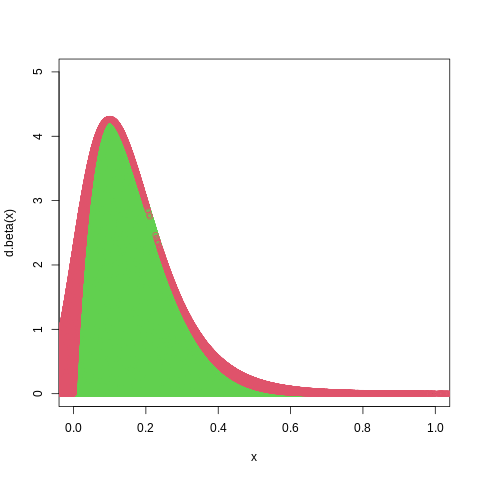

In [ ]:
%%R
curve(d.beta(x), from = 0, to = 1, col = 4, ylim = c(0, 5))
curve(M * devd(x, 0.1,0.1), from = 0, to = 1, add = TRUE, lty = 2, lwd = 2)
points(x, ua * M * g(x), col = 3)
points(y[u >= r], ur * M * g(y[u >= r]), col = 2)

In [ ]:
%%R
## Quantos foram aceitados
length(x)/length(y)

[1] 0.862


In [ ]:
%%R
## Taxa (teorica) de aceitacao é
1/M

[1] 0.8617312


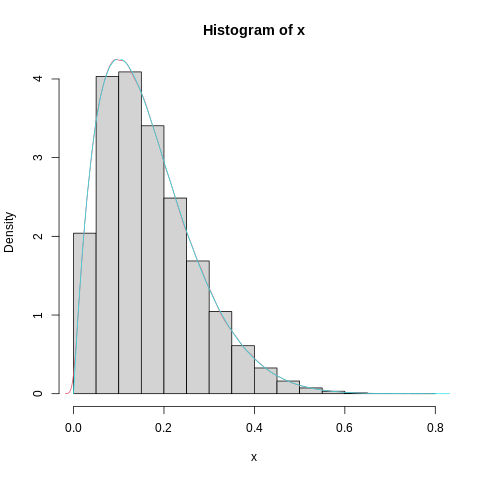

In [ ]:
%%R
par(mfrow = c(1, 1))
hist(x, freq = FALSE); lines(density(x), col = 2)
curve(d.beta(x), add = TRUE, from = 0, to = 1, col = 5)

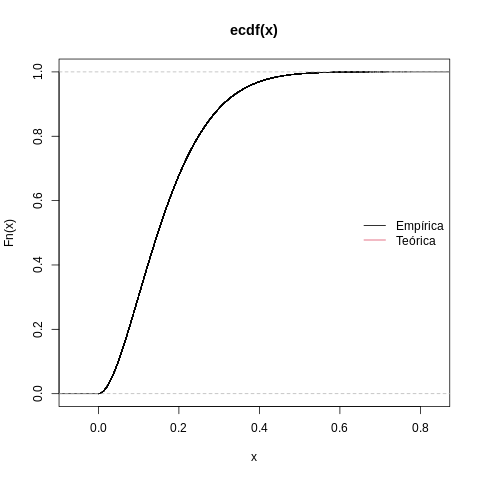

In [ ]:
%%R
plot(ecdf(x))
legend("right", legend = c("Empírica", "Teórica"),
       lty = 1, col = 1:5, bty = "n")
par(mfrow = c(1, 2))